In [ ]:
# !unzip ../data/validation/validation_data.zip

In [1]:
cd ..

/home/jovyan/Robbi/dea-coastlines


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd

# Load DEA Coastlines code
import coastlines.validation


rename_dict = {
    'Beachrock undiff': 'rocky',
    'Beachrock undiff dominant': 'rocky',
    'Boulder or shingle-grade beach undiff': 'rocky',
    'Boulder groyne or breakwater undiff': 'rocky',
    'Flat boulder deposit (rock) undiff': 'rocky',
    'Hard bedrock shore': 'rocky',
    'Hard bedrock shore inferred': 'rocky',
    'Hard rock cliff (>5m)': 'rocky',
    'Hard rocky shore platform': 'rocky',
    'Rocky shore platform (undiff)': 'rocky',
    'Sloping boulder deposit (rock) undiff': 'rocky',
    'Sloping hard rock shore': 'rocky',
    'Sloping soft `bedrock¿ shore': 'rocky',
    'Sloping soft \u2018bedrock\u2019 shore': 'rocky',
    'Soft `bedrock¿ shore inferred': 'rocky',
    'Soft `bedrock¿ shore platform': 'rocky',
    'Beach (sediment type undiff)': 'sandy',
    'Fine-medium sand beach': 'sandy',
    'Fine-medium sandy tidal flats': 'sandy',
    'Mixed sand and shell beach': 'sandy',
    'Mixed sandy shore undiff': 'sandy',
    'Perched sandy beach (undiff)': 'sandy',
    'Sandy beach undiff': 'sandy',
    'Sandy beach with cobbles/pebbles (rock)': 'sandy',
    'Sandy shore undiff': 'sandy',
    'Sandy tidal flats': 'sandy',
    'Sandy tidal flats with coarse stony debris': 'sandy',
    'Sandy tidal flats, no bedrock protruding': 'sandy',
    'Sloping coffee rock deposit': 'rocky',
    'Muddy tidal flats': 'muddy',
    'Tidal flats (sediment undiff)': 'muddy',
    'Artificial shoreline undiff': 'rocky',
    'Artificial boulder structures undiff': 'rocky',
    'Boulder revetment': 'rocky',
    'Boulder seawall': 'rocky',
    'Concrete sea wall': 'rocky',
    'Piles (Jetty)': 'rocky',
    'Coarse sand beach': 'sandy'
}


In [ ]:
!wget https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/derivative/dea_coastlines/v0.0.3/coastlines_v0.0.3.gpkg -P data/releases

In [10]:
!wget https://data.dea.ga.gov.au/derivative/dea_coastlines/1-1-0/DEACoastlines_gpkg_v1.1.0.zip -P data/releases

--2023-02-01 23:49:36--  https://data.dea.ga.gov.au/derivative/dea_coastlines/1-1-0/DEACoastlines_gpkg_v1.1.0.zip
Resolving data.dea.ga.gov.au (data.dea.ga.gov.au)... 18.67.111.81, 18.67.111.13, 18.67.111.49, ...
Connecting to data.dea.ga.gov.au (data.dea.ga.gov.au)|18.67.111.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1407871591 (1.3G) [application/zip]
Saving to: ‘data/releases/DEACoastlines_gpkg_v1.1.0.zip’

DEACoastlines_gpkg_ 100%[===================>]   1.31G  45.6MB/s    in 27s     

2023-02-01 23:50:04 (49.1 MB/s) - ‘data/releases/DEACoastlines_gpkg_v1.1.0.zip’ saved [1407871591/1407871591]



In [11]:
!unzip data/releases/DEACoastlines_gpkg_v1.1.0.zip data/releases

Archive:  data/releases/DEACoastlines_gpkg_v1.1.0.zip
  inflating: DEACoastlines_v1.1.0.gpkg  


In [32]:
import glob

val_paths = glob.glob('data/validation/interim/*2020test_narrabeen.csv')

prefix = 'v0.0.3'
deacl_path = 'data/releases/coastlines_v0.0.3.gpkg'
layer_name = 'shorelines_annual'

# prefix = 'v1.1.0'
# deacl_path = 'data/releases/DEACoastlines_v1.1.0.gpkg'
# layer_name = 'DEACoastlines_annualshorelines_v1.1.0'

In [16]:
  
# Non-parallel (for testing)
for val_path in val_paths:
#     try:
    coastlines.validation.deacl_validation(val_path=val_path, deacl_path=deacl_path, datum=0, prefix=prefix, overwrite=True, layer_name=layer_name)
#     except:
#         print

/env/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/env/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [12]:
# from concurrent.futures import ProcessPoolExecutor
# from tqdm import tqdm
# from itertools import repeat

# args = [deacl_path, 0, prefix, True]

# with ProcessPoolExecutor() as executor:

#     # Apply func in parallel
#     groups = val_paths
#     to_iterate = (groups, *(repeat(i, len(groups)) for i in args))
#     tqdm(executor.map(coastlines.validation.deacl_validation, *to_iterate), total=len(groups))


In [30]:
# Load all results into a single file
print('Combining data')
stats_list = glob.glob(f'data/validation/processed/{prefix}_*.csv')
stats_df = pd.concat([pd.read_csv(csv) for csv in stats_list])

# Rename smartline categories to smaller subset
stats_df['smartline'] = stats_df.smartline.replace(rename_dict)

# Export to file
# stats_df.to_csv('deacl_results.csv', index=False)

# Run stats
coastlines.validation.deacl_val_stats(stats_df.val_dist,
                          stats_df.deacl_dist,
                          n=stats_df.n,
                          remove_bias=True)

Combining data


n        2669.000
mae         4.140
rmse        5.470
stdev       5.490
corr        0.976
bias       -2.640
dtype: float64

In [31]:
v111 = stats_df.groupby('year').apply(lambda x: coastlines.validation.deacl_val_stats(x.val_dist,
                          x.deacl_dist,
                          n=x.n,
                          remove_bias=True))

In [33]:
# Load all results into a single file
print('Combining data')
stats_list = glob.glob(f'data/validation/processed/{prefix}_*.csv')
stats_df = pd.concat([pd.read_csv(csv) for csv in stats_list])

# Rename smartline categories to smaller subset
stats_df['smartline'] = stats_df.smartline.replace(rename_dict)

# Export to file
# stats_df.to_csv('deacl_results.csv', index=False)

# Run stats
coastlines.validation.deacl_val_stats(stats_df.val_dist,
                          stats_df.deacl_dist,
                          n=stats_df.n,
                          remove_bias=True)

Combining data


n        2669.000
mae         4.160
rmse        5.550
stdev       5.570
corr        0.975
bias       -2.630
dtype: float64

In [34]:
v200 = stats_df.groupby('year').apply(lambda x: coastlines.validation.deacl_val_stats(x.val_dist,
                          x.deacl_dist,
                          n=x.n,
                          remove_bias=True))

<AxesSubplot:xlabel='year'>

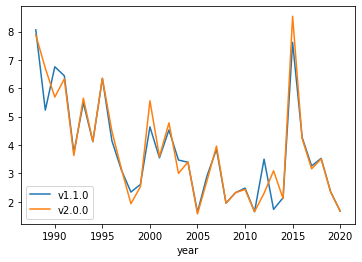

In [40]:
v111.rmse.rename('v1.1.0').plot(legend=True)
v200.rmse.rename('v2.0.0').plot(legend=True)

In [61]:
# Stats by substrate, no bias correction
by_smartline = stats_df.query("n >= 22").groupby('smartline').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n))
by_smartline_nobias = stats_df.query("n >= 22").groupby('smartline').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n, True))

out = coastlines.validation.rse_tableformat(by_smartline, by_smartline_nobias, 'smartline')
out

,n,Bias (m),MAE (m),RMSE (m),SD (m),Correlation
smartline,,,,,,
sandy,2451,-7.9,10.0 (5.9),11.5 (8.4),8.4,0.961


In [62]:
# Stats by substrate, no bias correction
by_smartline = stats_df.query("n < 22").groupby('smartline').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n))
by_smartline_nobias = stats_df.query("n < 22").groupby('smartline').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n, True))

out = coastlines.validation.rse_tableformat(by_smartline, by_smartline_nobias, 'smartline')
out

,n,Bias (m),MAE (m),RMSE (m),SD (m),Correlation
smartline,,,,,,
sandy,55197,1.0,11.4 (11.4),16.1 (16.1),16.1,0.991
rocky,2827,-9.6,14.1 (10.5),18.9 (16.3),16.3,0.997
muddy,1539,-9.4,16.8 (16.5),26.7 (25.0),25.0,0.961


In [38]:
# !pip install git+https://github.com/GeoscienceAustralia/dea-intertidal.git

In [36]:
from intertidal import validation

In [37]:
validation.eval_metrics(x=stats_df.val_dist, y=stats_df.deacl_dist)

Correlation          0.991
RMSE                14.166
MAE                 10.194
R-squared            0.979
Bias                -6.290
Regression slope     0.973
dtype: float64

In [31]:
by_source = stats_df.groupby('source').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n))
by_source_nobias = stats_df.groupby('source').apply(
    lambda x: coastlines.validation.deacl_val_stats(x.val_dist, x.deacl_dist, x.n, True))

coastlines.validation.rse_tableformat(by_source, by_source_nobias)


,n,Bias (m),MAE (m),RMSE (m),SD (m),Correlation
source,,,,,,
drone photogrammetry,298,1.0,3.6 (3.5),4.6 (4.5),4.5,0.681
aerial photogrammetry,1172,5.8,8.9 (7.4),12.4 (11.0),11.0,0.993
hydrographic survey,234,2.6,11.1 (11.1),14.9 (14.7),14.7,0.966
lidar,271,15.0,20.2 (13.5),22.9 (17.3),17.4,0.981


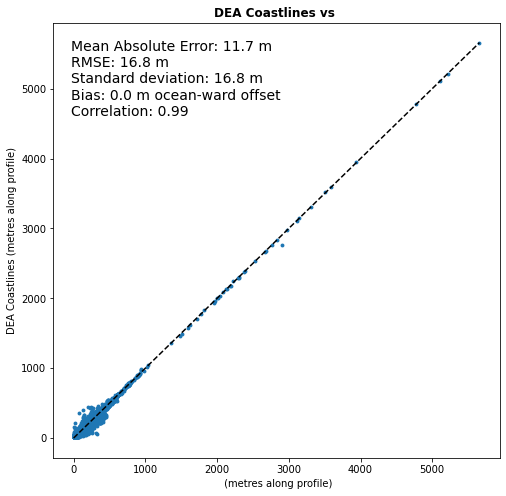

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Print stats and plot scatterplot
stats_subset = stats_df  


def val_plot(df, 
             title='Validation',
             scatter=True, 
             density=False,
             time=True, 
             time_stat='mean',
             time_legend_pos=[0.8, 0.035],
             offset=0,
             extent=(0, 120),
             scatter_kwargs={}, 
             time_kwargs={}):
    
    # Copy data and apply offset
    df = df.copy()
    df['error_m'] += offset
    df['deacl_dist'] += offset

    # Compute stats  
    n, mae, rmse, stdev, corr, bias = coastlines.validation.deacl_val_stats(
        val_dist=df.val_dist, 
        deacl_dist=df.deacl_dist)    
    offset_str = 'landward offset' if bias > 0 else 'ocean-ward offset'

    if scatter:
        
        # Plot data as scatterplot
        fig, ax = plt.subplots(figsize=(8, 8))
        df.plot.scatter(x='val_dist',
                        y='deacl_dist',
                        s=15,
                        edgecolors='black',
                        linewidth=0,
#                         xlim=extent,
#                         ylim=extent,
                        ax=ax,
                        **scatter_kwargs)
        
        # Add dashed line
        
        
        ax.plot(
                np.linspace(df.loc[:, ['deacl_dist', 'val_dist']].values.min(), 
                            df.loc[:, ['deacl_dist', 'val_dist']].values.max()),
                np.linspace(df.loc[:, ['deacl_dist', 'val_dist']].values.min(), 
                            df.loc[:, ['deacl_dist', 'val_dist']].values.max()),
                color='black',
                linestyle='dashed')
        
        ax.set_xlabel(f'{title} (metres along profile)')
        ax.set_ylabel(f'DEA Coastlines (metres along profile)')
        
        # Add annotation
        ax.annotate(f'Mean Absolute Error: {mae:.1f} m\n' \
                    f'RMSE: {rmse:.1f} m\n' \
                    f'Standard deviation: {stdev:.1f} m\n' \
                    f'Bias: {bias:.1f} m {offset_str}\n' \
                    f'Correlation: {corr:.2f}\n',
                    xy=(0.04, 0.75),
                    fontsize=14,
                    xycoords='axes fraction')

        # Set title
        plt.gca().set_title(f'DEA Coastlines vs {title}', weight='bold')
        
        # Export to file        
        fig.savefig(f"{title}_scatter_offset{offset:.1f}.png", dpi=300)
        
    if density:
        
        fig, ax = plt.subplots(figsize=(8, 8))

        g = sns.kdeplot(ax=ax,
                        data=df.val_dist,
                        data2=df.deacl_dist, 
                        cmap='YlOrRd', 
                        shade=True,
                        bw=3,
                        shade_lowest=False,
                        clip=(extent, extent))

        g.set(xlabel=f'{title} (metres along profile)', 
              ylabel=f'DEA Coastlines (metres along profile)')
        ax.set_title(f'DEA Coastlines vs {title}', weight='bold')

        # Add stats annotation
        ax.annotate(f'Mean Absolute Error: {mae:.1f} m\n' \
                    f'RMSE: {rmse:.1f} m\n' \
                    f'Standard deviation: {stdev:.1f} m\n' \
                    f'Bias: {bias:.1f} m {offset_str}\n' \
                    f'Correlation: {corr:.2f}\n',
                    xy=(0.04, 0.75),
                    fontsize=14,
                    xycoords='axes fraction')

        # Add diagonal line
        plt.gca().plot(np.linspace(*extent), 
                       np.linspace(*extent),
                       color='black',
                       linestyle='dashed')
        
        plt.gca().set_ylim(bottom=extent[0])
        plt.gca().set_xlim(left=extent[0])

        # Export to file
        fig = g.get_figure()
        fig.savefig(f"{title}_heatmap_offset{offset:.1f}.png", dpi=300)
        
    if time:
        
        # Group by beach and apply statistic
        stats_grouped = (df.groupby(['beach', 'year'], as_index=False)
                         .aggregate(time_stat)
                         .rename({'beach': 'id',
                                  'deacl_dist': 'DEA Coastlines',
                                  'val_dist': title}, axis=1)
                         .groupby('id')
                         .filter(lambda x: len(x) > 1))

        # Melt data into long format for faceted plotting
        stats_melted = pd.melt(stats_grouped, 
                               id_vars=['id', 'year'],
                               value_vars=['DEA Coastlines', title],
                               value_name='Distance (m)')

        # Plot facet data
        g = sns.relplot(data=stats_melted,
                        x="year", 
                        y="Distance (m)", 
                        col="id", 
                        hue="variable",
                        height=1.7, 
                        aspect=1.0, 
                        kind="line", 
                        legend='full', 
                        col_wrap=5,
                        **time_kwargs)
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(f'DEA Coastlines vs {title}', 
                       weight='bold', 
                       ha='right')
        
        # Simplify titles
        g.set_titles(row_template='{row_name}', 
                     col_template='{col_name}')

        # Customise legend
        g._legend.texts[0].set_text("")
        g._legend.set_bbox_to_anchor(time_legend_pos)
        
        # Export to file
        g.savefig(f"{title}_time_offset{offset:.1f}.png", dpi=300)
        
    return pd.Series({'Mean Absolute Error': mae, 
                    f'RMSE': rmse,
                    f'Standard deviation': stdev,
                    f'Bias': f'{bias:.1f} m {offset_str}',
                    f'Correlation': corr})

# for i, sub in stats_subset.groupby('smartline'):

#     # Run analysis
#     g = val_plot(df=sub,  # stats_subset,
#                  title=i.replace('/', '-'),
#                  scatter=True, 
#                  density=False,
#                  time=False,
#                  time_stat='median',
#                  time_legend_pos=[0.67, 0.11],
#                  offset=0,
#                  extent=(0, 1000))

# Run analysis
g = val_plot(df=stats_subset,  # stats_subset,
         title='',
         scatter=True, 
         density=False,
         time=False,
         time_stat='median',
         time_legend_pos=[0.67, 0.11],
         offset=0,
         extent=(0, 300))